#### **Understanding Auto Sales Trends Through Visualizations with Matplotib, Seaborn and Folium**

##### Objectives
- To understand historical trends in automobile sales during recession and non-recession periods
- To create informative and visually appealing plots with Matplotlib and Seaborn
- Apply visualizations to communicate insights from the data
- Analyze data through these visualizations
- Customize visualizations

Importing Required Libraries

In [220]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

---


##### Breakdown of recession periods from the "historical_automobile_sales" data:<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

##### Data Description
This dataset contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession periods. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10. Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
<br>11. Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12. Month: Month of the observation extracted from Date..
<br>13. Year: Year of the observation extracted from Date.
<br><br>
These factors can be utilized to gain insights into how recessions impacted automobile sales and how they differ from non-recession years.

---

##### Importing Data

In [221]:
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")

print('Data downloaded and read into a dataframe!')

df.head()

Data downloaded and read into a dataframe!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [222]:
df.describe().round(decimals=2)

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.00,528.00,528.00,528.00,528.00,528.00,528.00,528.00,528.00,528.00,528.00
mean,2001.50,0.21,101.14,0.58,24964.99,3067.46,6.06,40.07,-0.24,2.45,2352.72
std,12.71,0.41,10.60,0.45,4888.07,1139.56,1.97,16.25,0.86,1.12,1645.32
min,1980.00,0.00,73.90,0.00,8793.66,1009.00,3.00,12.51,-4.23,1.00,102.00
25%,1990.75,0.00,94.04,0.25,21453.30,2083.50,4.00,27.24,-0.57,1.60,793.95
50%,2001.50,0.00,100.74,0.50,25038.69,3072.00,6.00,39.21,-0.01,2.30,2182.60
75%,2012.25,0.00,108.24,0.75,28131.68,4067.25,8.00,53.51,0.39,2.90,3614.80
max,2023.00,1.00,131.67,1.50,44263.66,4983.00,9.00,70.37,0.82,6.00,21147.00


In [223]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

Normalizing GDP column to standardize corresponding data in the line charts comparing recession and non-recession years. 

In [224]:
#x - min/ max - min
df['norm_GDP'] = (df['GDP'] - df['GDP'].min()) / (df['GDP'].max() - df['GDP'].min())
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City,norm_GDP
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia,0.824577
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York,0.578544
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York,0.391128
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois,0.573134
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California,0.699703


---

##### TASK 1.1: Developed a *Line chart* to show how automobile sales fluctuate from year to year.

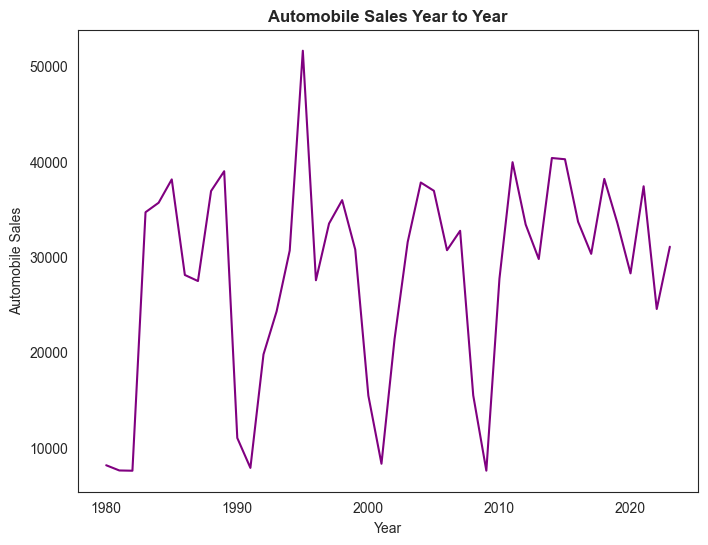

In [225]:
df_sales = df.groupby(['Year'])['Automobile_Sales'].sum()
df_sales

plt.figure(figsize=(8,6))

df_sales.plot(x=df_sales.index, y=df_sales.values, color='purple')
plt.title("Automobile Sales Year to Year", weight='bold')
plt.ylabel('Automobile Sales')

plt.show()

##### Added ticks on x-axis to identify the years of recession, annotations for years of recession

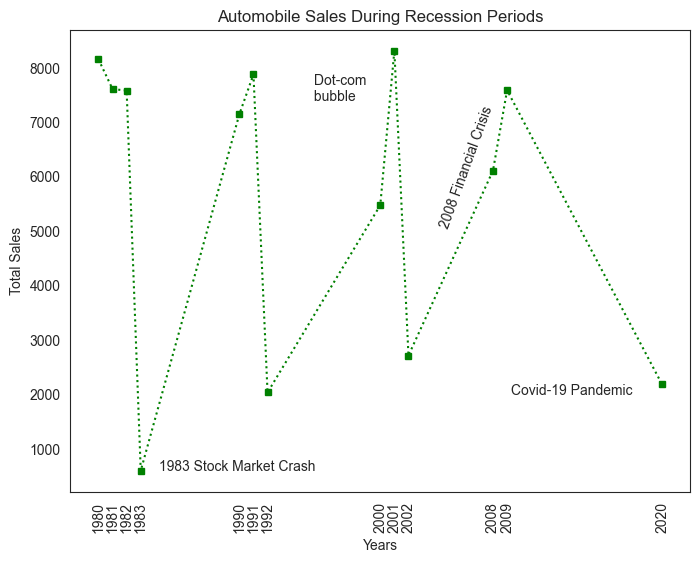

In [226]:
df_rec = df.loc[df['Recession']==1]
df_sales = df_rec.groupby(['Year'])['Automobile_Sales'].sum() # reset_index will convert back into a dataframe
#df_sales

fig, ax= plt.subplots(figsize=(8,6))

ax = df_sales.plot(x=df_sales.index, y=df_sales.values, marker='s', markersize=5, linestyle='dotted', color='green')

ax.set_title("Automobile Sales During Recession Periods")
ax.set_xlabel("Years")
ax.set_ylabel("Total Sales")
ax.set_xticks(df_sales.index)
ax.set_xticklabels(df_sales.index, rotation=90)
ax.annotate(' Dot-com\n bubble',xy=(1995, 7400)) 
ax.annotate(' 2008 Financial Crisis',xy=(2004, 5000), rotation=70)
ax.annotate(' 1983 Stock Market Crash',xy=(1984, 600))
ax.annotate(' Covid-19 Pandemic',xy=(2009, 2000))

plt.show()

#####  TASK 1.2: Plotted lines for categories of vehicle type to answer the following: 
Is there a noticeable difference in sales trends between different vehicle types during recession periods?

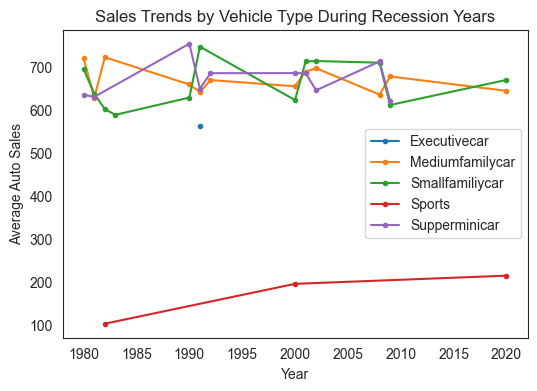

In [227]:
df_rec = df[(df['Recession']==1) & (df['Year']>=1980) & (df['Year']<=2020)]

df_auto = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_auto.set_index('Year', inplace=True)
df_auto_gp = df_auto.groupby(['Vehicle_Type'])['Automobile_Sales']

plt.figure(figsize=(6,4))

df_auto_gp.plot(kind='line', marker='o', markersize=3)

plt.title('Sales Trends by Vehicle Type During Recession Years')
plt.xlabel('Year')
plt.ylabel('Average Auto Sales')
plt.legend()
plt.show()

What insights can be gained on the sales of these vehicle types?<br> 

Inference: Most vehicle types sold between 600 and 700 units during recession years, with the exception of Sports and Executivecar vehicles. Sales of sports vehicles grew gradually across recession years, but experienced lower sales in terms of volume compared to other vehicle types. Added incentives likely attributed to the slight uptick in sales growth for Sports vehicles, as well as changes in personal preferences and consumers spending habits, demonstrating strong resilience and stability for the luxury market during economic downturns. Lower demand and differences in consumer preferences resulted in poor sales performance for Executivecar, demonstrating less market resilience for this luxury vehicle type during recession years.

----

##### TASK 1.3: Compared sales trends per vehicle type for recession and non-recession periods.

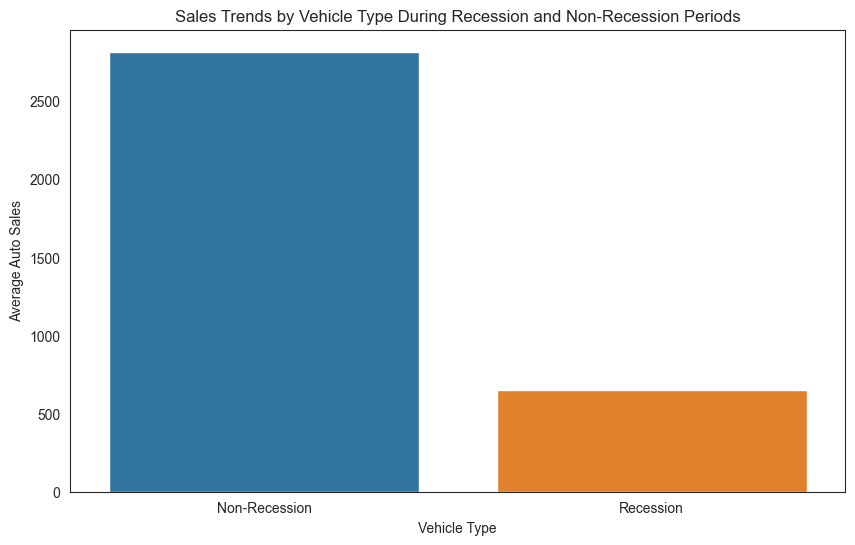

In [228]:
df_auto_nr = df.groupby(['Recession'])['Automobile_Sales'].mean().reset_index()
#df_auto_nr.set_index('Vehicle_Type', inplace=True)
#df_auto_new = df_auto_nr.groupby(['Vehicle_Type'])['Automobile_Sales']

plt.figure(figsize=(10,6))

sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=df_auto_nr, legend=None)

plt.title("Sales Trends by Vehicle Type During Recession and Non-Recession Periods")
plt.xlabel('Vehicle Type')
plt.ylabel('Average Auto Sales')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.grid(False)

plt.show()

##### Compared sales of different vehicle types during recession and non-recession periods.

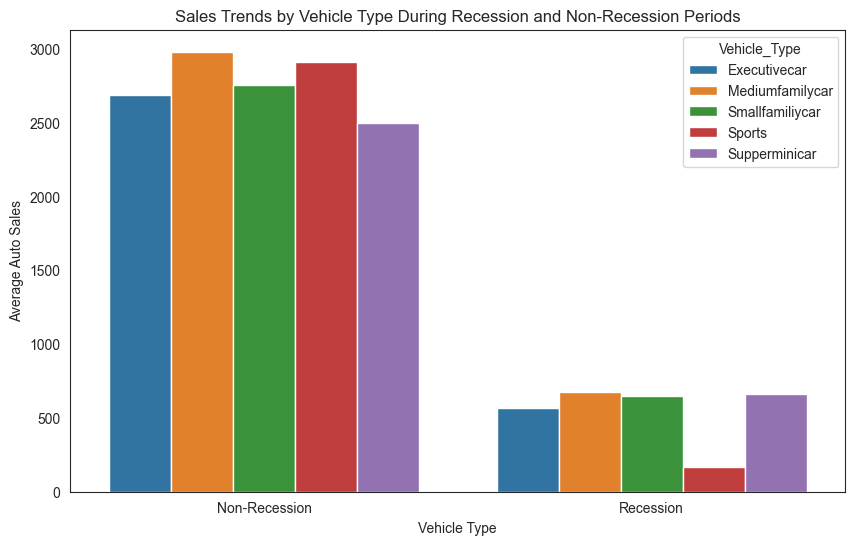

In [229]:
df_auto_nr = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=df_auto_nr)

plt.title("Sales Trends by Vehicle Type During Recession and Non-Recession Periods")
plt.xlabel('Vehicle Type')
plt.ylabel('Average Auto Sales')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])

plt.show()

What insights can be gained on the overall sales of automobiles during recession?

Inference: Automobile sales experienced better sales during non-recession years due to more favorable market conditions and strong economic activity. Sales for all vehicle types were significantly reduced during recession years due to economic uncertainty and changes in consumer spending habits.

---

##### TASK 1.4: Compared the variations in GDP during recession and non-recession periods with line subplots for each period.

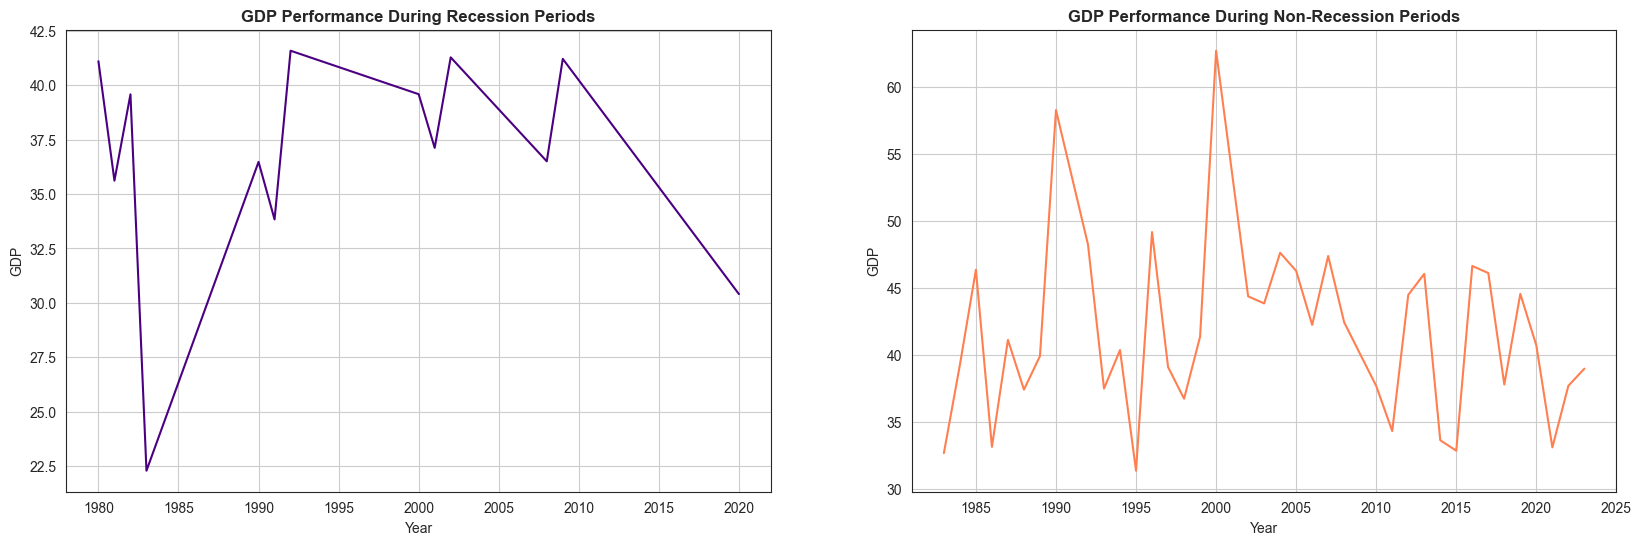

In [230]:
#df_nrec = df[(df['Recession']==0) & (df['Year']>=1980) & (df['Year']<=2023)]
df_nrec = df[df['Recession']==0]
df_gdp1 = df_nrec.groupby(['Year','Recession'], as_index=False)['GDP'].mean()
df_gdp1.set_index('Year', inplace=True)
df_gdp1 = df_gdp1.groupby(['Recession'])['GDP']

df_gdp = df_rec.groupby(['Year','Recession'], as_index=False)['GDP'].mean()
df_gdp.set_index('Year', inplace=True)
df_gdp = df_gdp.groupby(['Recession'])['GDP']

fig = plt.figure()

ax0= fig.add_subplot(1,2,1)
ax1= fig.add_subplot(1,2,2)

sns.set_style('darkgrid')

#plot 1
df_gdp.plot(kind='line', color='indigo', figsize=(20,6), ax=ax0)
ax0.set_title('GDP Performance During Recession Periods', weight='bold')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

#plot 2
df_gdp1.plot(kind='line', color='coral', figsize=(20,6), ax=ax1)
ax1.set_title('GDP Performance During Non-Recession Periods', weight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

plt.show()

The subplots above illustrate GDP's downward trend during recessions with fluctuations in growth during non-recession years. 

---

##### TASK 1.5: Developed a Bubble plot for displaying the impact of seasonality on Automobile Sales, using seasonality weight to represent the size of each bubble.
How has seasonality impacted the sales during non-recession years, in which months the sales were high or low? 

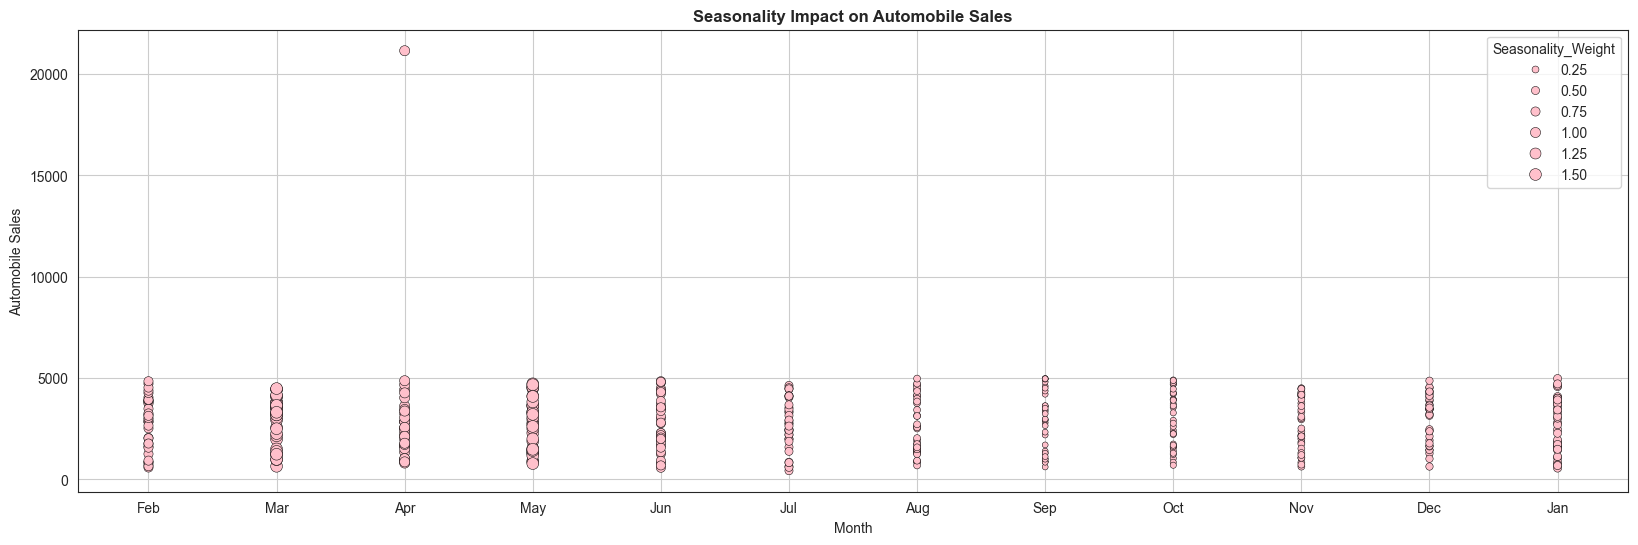

In [231]:
df_rec = df[(df['Recession']==1) & (df['Year']>=1980) & (df['Year']<=2020)]
df_nrec = df[(df['Recession']==0) & (df['Year']>=1980) & (df['Year']<=2020)]

fig = plt.figure(figsize=(20,6))

sns.set_style("white")

non_rec = df[df['Recession'] == 0] 
size=non_rec['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec, x='Month', y='Automobile_Sales', size=size, edgecolor='black', color='pink')
    
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales', weight='bold')
plt.grid(True)

plt.show()

Inference: From this plot, it is evident that seasonality had no impact on overall sales since sales performance remained consistent throughout the year, including in months March and May, where seasonality is particularly weighted. However, there is a significant uptick in sales for the month of April. 

---


 ##### TASK 1.6: 
1) Developed a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
2) Developed a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period.

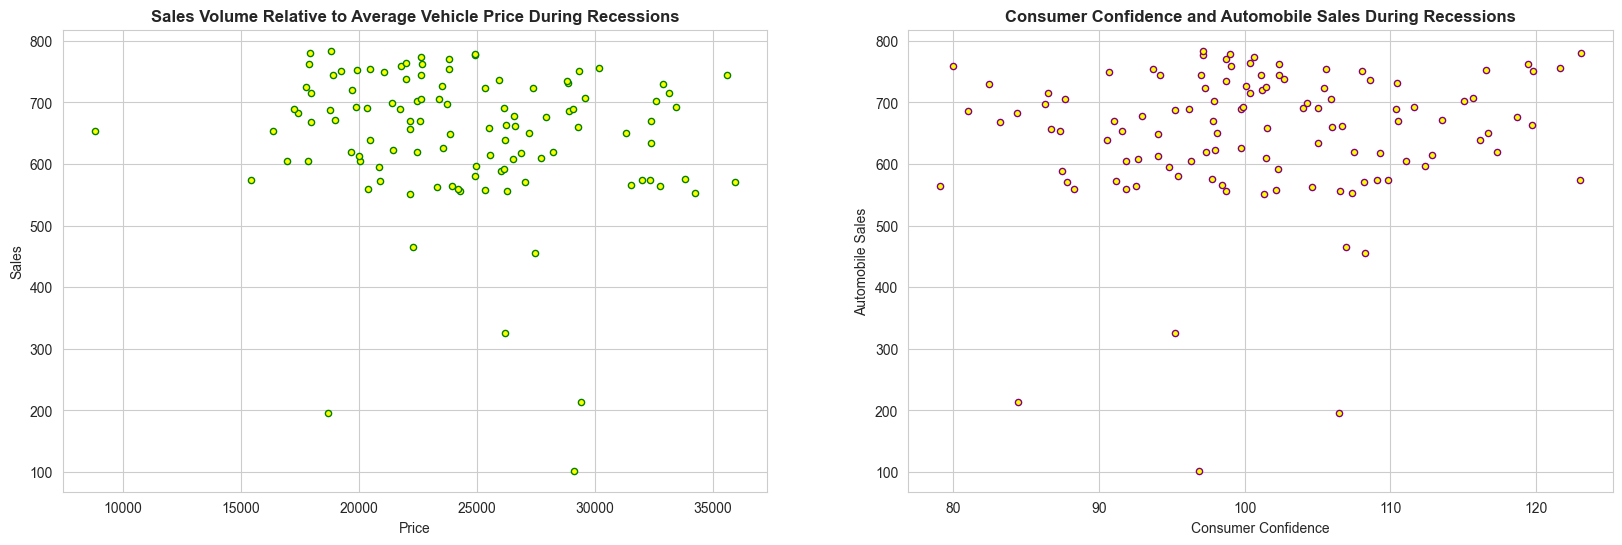

Correlation between Auto Sales and Price:                   Automobile_Sales     Price
Automobile_Sales          1.000000 -0.146819
Price                    -0.146819  1.000000
Correlation between Consumer Confidence and Auto Sales:                      Consumer_Confidence  Automobile_Sales
Consumer_Confidence             1.000000          0.100793
Automobile_Sales                0.100793          1.000000


In [240]:
cons_conf = df_rec[['Consumer_Confidence', 'Automobile_Sales']]
cons_conf.corr()

sns.set_style('whitegrid')

fig = plt.figure(figsize=(20,6))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Plot 1
price_vol = df_rec.groupby(['Automobile_Sales'], as_index=False)['Price'].mean()
price_sales = df_rec[['Automobile_Sales', 'Price']]
price_sales.corr()

price_vol.plot(kind='scatter', x='Price', y='Automobile_Sales', color='yellow', edgecolors='green', ax=ax0)
ax0.set_title('Sales Volume Relative to Average Vehicle Price During Recessions', weight='bold')
ax0.set_xlabel('Price')
ax0.set_ylabel('Sales')

# Plot 2
cons_conf.plot(kind='scatter', x='Consumer_Confidence', y='Automobile_Sales', color='yellow', edgecolors='purple', ax=ax1)
ax1.set_title('Consumer Confidence and Automobile Sales During Recessions', weight='bold')
ax1.set_xlabel('Consumer Confidence')
ax1.set_ylabel('Automobile Sales')

plt.show()

print("Correlation between Auto Sales and Price:", price_sales.corr())
print("Correlation between Consumer Confidence and Auto Sales:", cons_conf.corr())

How does the average vehicle price relate to the sales volume during recessions?

Inference: No correlation exists between the two attributes.

----


##### TASK 1.7: Created a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


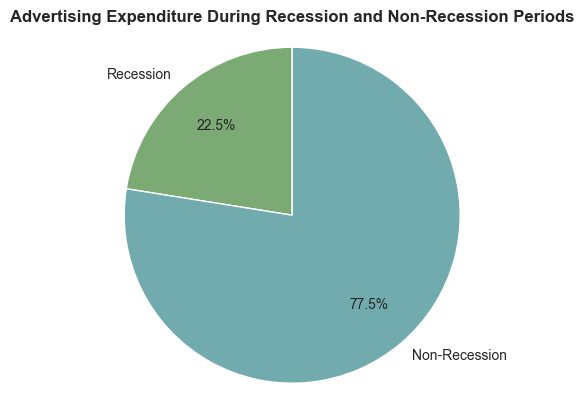

In [234]:
df_rec = df[(df['Recession']==1) & (df['Year']>=1980) & (df['Year']<=2020)]
df_nrec = df[(df['Recession']==0) & (df['Year']>=1980) & (df['Year']<=2020)]

xyz_ad_rec = df_rec.groupby(['Recession'])['Advertising_Expenditure'].sum().reset_index()
#df_nrec.rename(columns={'Recession':'Non-Recession'})
xyz_ad_nrec = df_nrec.groupby(['Recession'])['Advertising_Expenditure'].sum().reset_index()

df_pie = pd.concat([xyz_ad_rec['Advertising_Expenditure'], xyz_ad_nrec['Advertising_Expenditure']])
#labels = pd.concat([xyz_ad_rec['Recession'], xyz_ad_nrec['Non-Recession']])
labels = ['Recession', 'Non-Recession']

plt.figure()

colors = ['#7BAA74', '#71ABAD']

plt.pie(df_pie,
        autopct='%1.1f%%',
                startangle=90,
                shadow=False,
                pctdistance=.7,
                labels=labels, 
                colors=colors)

plt.title('Advertising Expenditure During Recession and Non-Recession Periods', weight='bold')
plt.axis('equal')
plt.show()

##### What insights were found on the advertisement expenditure during recession and non recession periods?

Inference: Advertising expenditure, at 77.5%, was ~3x higher during non-recession years than recession years, and likely due to better market conditions, economic activity, and increases in consumer spending. Advertising expenditure during recession years was significantly lower and likely due to more cautious spending habits and market uncertainty.

---


##### TASK 1.8: Developed a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


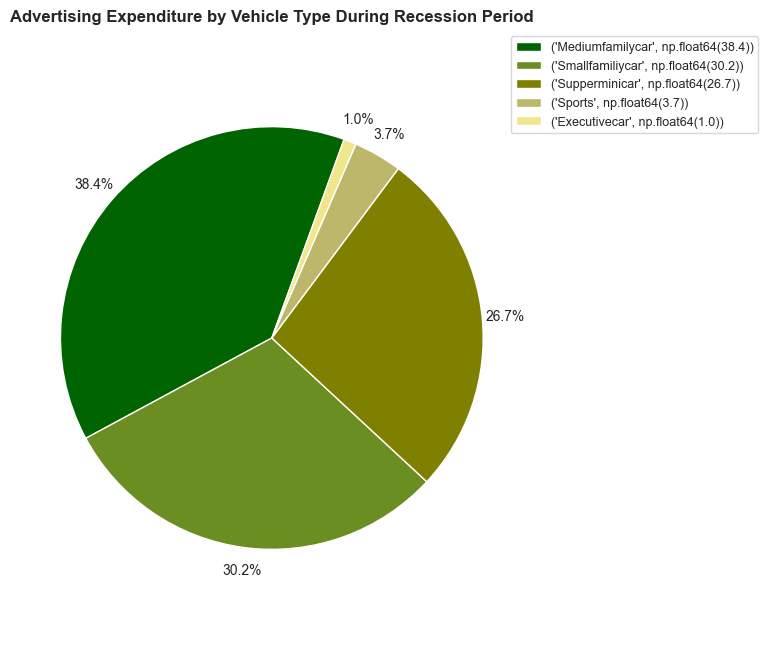

In [235]:
ad_veh_rec = df_rec.groupby(['Vehicle_Type'])['Advertising_Expenditure'].sum()
ad_veh_rec = ad_veh_rec.sort_values(ascending=False)
colors = ['#006400','#6B8E23','#808000','#BDB76B', '#F0E68C']

plt.figure(figsize=(6,8))

plt.pie(ad_veh_rec, 
        autopct='%1.1f%%',
        startangle=70,
        pctdistance=1.11,
        colors=colors)

plt.title('Advertising Expenditure by Vehicle Type During Recession Period', weight='bold')
plt.axis('equal')
plt.legend([(i,round(k/ad_veh_rec.sum()*100,1)) for i,k in zip(ad_veh_rec.index, ad_veh_rec)], bbox_to_anchor=(1,1), fontsize = 9)
plt.show()

Inference: Advertising expenditures concentrated on lower-priced vehicles, which aligns with overall sales trends (Task 1.2 - line chart) during recession periods.

----


 ##### TASK 1.9: Developed a lineplot to analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period.

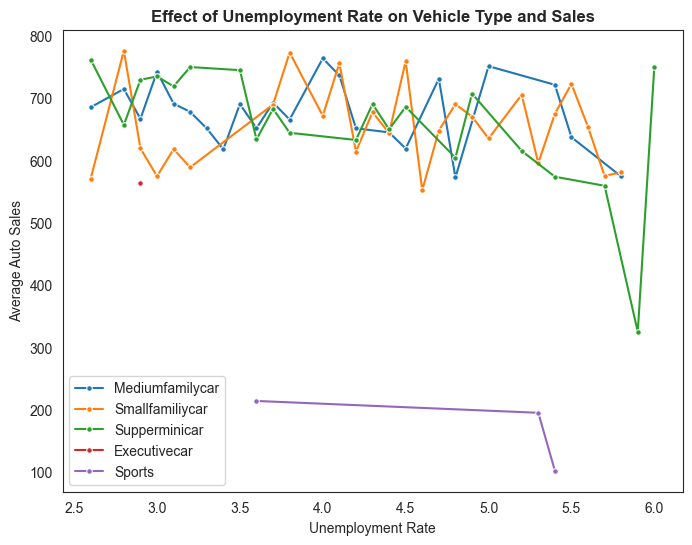

In [236]:
ur_auto_rec = df_rec.groupby(['unemployment_rate', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

plt.figure(figsize=(8,6))

sns.lineplot(data=ur_auto_rec, x = 'unemployment_rate', y = 'Automobile_Sales', hue='Vehicle_Type', marker='o', markersize=4)

plt.title('Effect of Unemployment Rate on Vehicle Type and Sales', weight='bold')
plt.xlabel('Unemployment Rate')
plt.ylabel('Average Auto Sales')
plt.legend()

plt.show()

#### What insights are gained on the sales of superminicar, smallfamilycar, mediumfamilycar?

Inference: Changes in buying patterns. Smallfamilycar and Mediumfamilycar showed fluctuations in sales before its descent as the unemployment rate reached 5.4% and 5.5% respectively. No sales were recorded for these vehicle types once the unemployment rate reached 5.8%, which was likely attributed to market uncertainty, as well as changes in spending habits and demand. Supperminicar sales declined significantly at this point, selling just over 300 vehicles before sales rebounded at 6%. The decline in sales may be attributed to economic concerns and cautious consumer spending habits. The rebound was perhaps due to heavy promotions and better refinancing options, demonstrating resilience for this vehicle type and anticipation of improved market conditions.

---


##### TASK 1.10 Created a map on the hightest sales region/offices of the XYZ company during recession period

Since the dataset also contains the location/city for company offices, we can show the recession impact on various offices/city sales through a choropleth.

In [ ]:
state_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

city_sales = df_rec.groupby(['City'], as_index=False)['Automobile_Sales'].sum()

sales_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

sales = folium.Choropleth(
    geo_data=state_geo,
    data=city_sales,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Recession Impact on City Sales'
    ).add_to(sales_map)

sales.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

# display map
sales_map


Author of original IBM Lab

[Dr. Pooja](author_link)


``` toggle ## Change Log
```


<!---|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
2024-01-05|0.2.1|Sowmyaa Gurusamy|Updated the lab instructions|
|2023-06-17|0.2|Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|-->


Copyright © 2023 IBM Corporation. All rights reserved.
